![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# DATA SCIENCE PROJECT K163715,K163733

# Bitcoin Price Precdiction

In [140]:
import numpy as  np
import pandas as pd
import pylab as p
import matplotlib.pyplot as plt
from collections import Counter
import re

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

**Extracting Data from CSV File**

In [141]:
df=pd.read_csv('curr.csv')

C:\Users\Huzaifa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Displaying Data In CSV FIle**

In [142]:
print(df)

       Currencyname       Date    MarketCap     Close  Open      High  \
0                0x  16-Aug-17   67,034,800  0.224399  0.11  0.280031   
1                0x  17-Aug-17  133,813,000  0.206735  0.22  0.238935   
2                0x  18-Aug-17  123,335,000  0.293387  0.21   0.35026   
3                0x  19-Aug-17  176,747,000  0.478768  0.29  0.543728   
4                0x  20-Aug-17  282,777,000  0.424265  0.47  0.475262   
...             ...        ...          ...       ...   ...       ...   
535163      zurcoin  20-Nov-17      131,532  0.001558  0.00  0.001567   
535164      zurcoin  21-Nov-17      134,581  0.001449  0.00  0.001691   
535165      zurcoin  22-Nov-17      125,544  0.001892  0.00  0.003295   
535166      zurcoin  23-Nov-17      163,521  0.001689  0.00  0.002643   
535167      zurcoin  24-Nov-17      145,940  0.001974  0.00   0.00238   

             Low      Volume  Unnamed: 8  
0       0.103962   5,232,600         NaN  
1       0.206735   2,752,410         

**Cleaning Required Data**

In [143]:
btc= df.loc[df['Currencyname'] == 'bitcoin']
print(btc)
btc.isnull().sum()
btc=btc.iloc[:,[1,3]]
print(btc)
btc["Close"] = btc["Close"].astype('float64')
btc.info()
btc['Date'] = pd.to_datetime(btc['Date'])
print(btc)


      Currencyname       Date        MarketCap    Close      Open     High  \
53546      bitcoin  27-Dec-13    9,295,570,000   735.07    763.28   777.51   
53547      bitcoin  28-Dec-13    8,990,850,000   727.83    737.98   747.06   
53548      bitcoin  29-Dec-13    8,872,600,000   745.05    728.05   748.61   
53549      bitcoin  30-Dec-13    9,037,000,000   756.13    741.35    766.6   
53550      bitcoin  31-Dec-13    9,268,240,000   754.01    760.32   760.58   
...            ...        ...              ...      ...       ...      ...   
54970      bitcoin  20-Nov-17  134,167,000,000  8200.64  8,039.07  8336.86   
54971      bitcoin  21-Nov-17  136,967,000,000  8071.26  8,205.74  8348.66   
54972      bitcoin  22-Nov-17  134,851,000,000  8253.55  8,077.95  8302.26   
54973      bitcoin  23-Nov-17  137,444,000,000  8038.77  8,232.38   8267.4   
54974      bitcoin  24-Nov-17  134,816,000,000  8253.69  8,074.02  8374.16   

           Low         Volume  Unnamed: 8  
53546    713.6     

**Plotting the time series**

<class 'pandas.core.frame.DataFrame'>
             Close
Date              
2013-12-27  735.07
2013-12-28  727.83
2013-12-29  745.05
2013-12-30  756.13
2013-12-31  754.01


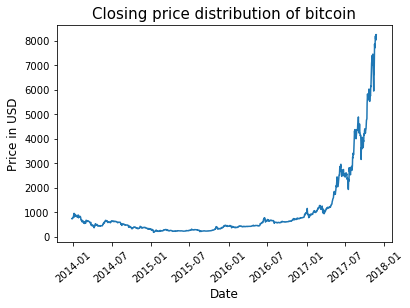

In [144]:
btcdata = btc['Close']
btcdate = btc['Date']
btctrain1 = btc[['Date','Close']]
btctrain2 = btctrain1.set_index('Date')
btctrain2.sort_index(inplace=True)
print (type(btctrain2))
print (btctrain2.head())
plt.plot(btctrain2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.xticks(rotation=40)
plt.show()

**Testing the Stationarity**
**Augmented Dicky Fuller Test**

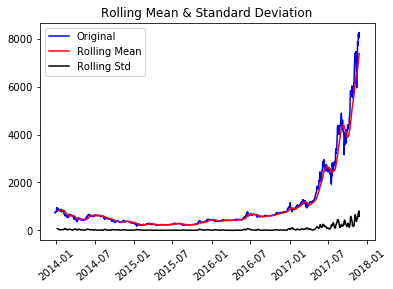

ADF Stastistic: 4.259204
p-value: 1.000000
The graph is non stationery
Critical values:
	1%: -3.435 
	5%: -2.864 
	10%: -2.568 


In [145]:
from statsmodels.tsa.stattools import adfuller

def test_stationaritybtc(x):

    btcrolmean = x.rolling(window=22,center=False).mean()
    btcrolstd = x.rolling(window=12,center=False).std()
    btcorig= plt.plot(x, color='blue',label='Original')
    btcmean = plt.plot(btcrolmean, color='red', label='Rolling Mean')
    btcstd = plt.plot(btcrolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=40)
    plt.show(block=False)
    
    btcresult=adfuller(x)
    print('ADF Stastistic: %f'%btcresult[0])
    print('p-value: %f'%btcresult[1])
    btcpvalue=btcresult[1]
    for key,value in btcresult[4].items():
            if btcresult[0]>value:
                print("The graph is non stationery")
                break
            else:
                print("The graph is stationery")
                break;
    print('Critical values:')
    for key,value in btcresult[4].items():
        print('\t%s: %.3f ' % (key, value))
        
btcts = btctrain2['Close']      
test_stationaritybtc(btcts)

**Log Transforming the series**

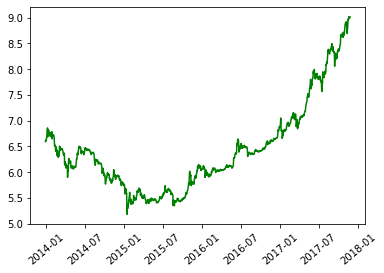

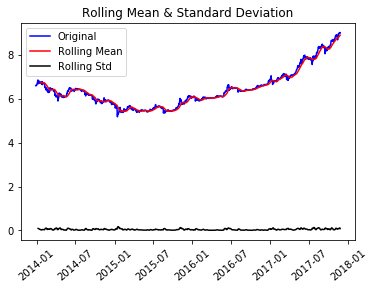

ADF Stastistic: 2.156151
p-value: 0.998844
The graph is non stationery
Critical values:
	1%: -3.435 
	5%: -2.864 
	10%: -2.568 


In [146]:
btcts_log = np.log(btcts)
plt.plot(btcts_log,color="green")
plt.xticks(rotation=40)
plt.show()

test_stationaritybtc(btcts_log)

**Remove trend and seasonality**

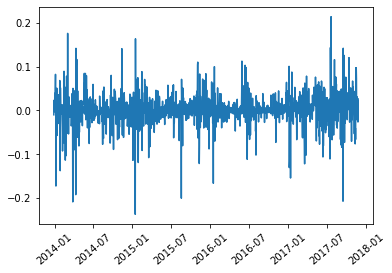

In [147]:
btcts_log_diff = btcts_log - btcts_log.shift()
plt.plot(btcts_log_diff)
plt.xticks(rotation=40)
plt.show()

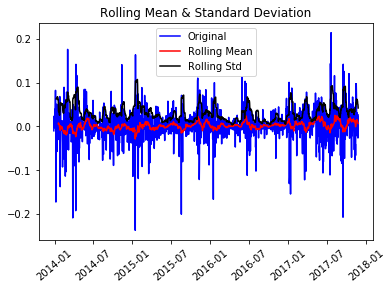

ADF Stastistic: -21.967259
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.435 
	5%: -2.864 
	10%: -2.568 


In [148]:
btcts_log_diff.dropna(inplace=True)
test_stationaritybtc(btcts_log_diff)

**Auto Regressive model**

C:\Users\Huzaifa\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Huzaifa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D

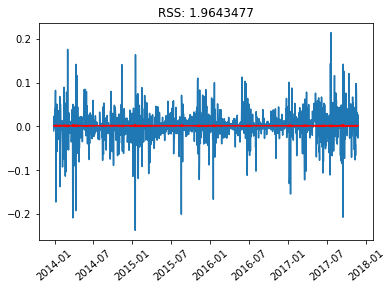

In [149]:
from statsmodels.tsa.arima_model import ARIMA
btcmodel = ARIMA(btcts_log, order=(1,1,0)) 
btcresults_ARIMA = btcmodel.fit(disp=-1)  
plt.plot(btcts_log_diff)
plt.plot(btcresults_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((btcresults_ARIMA.fittedvalues-btcts_log_diff)**2))
plt.xticks(rotation=40)
plt.show()

**Moving Average Model**

C:\Users\Huzaifa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Huzaifa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


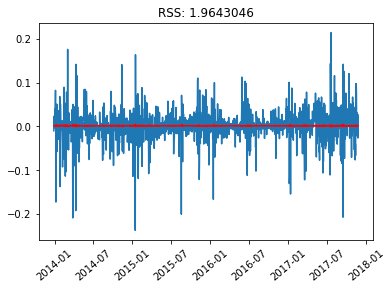

In [150]:
btcmodel = ARIMA(btcts_log, order=(0,1,1))  
btcresults_MA = btcmodel.fit(disp=-1)  
plt.plot(btcts_log_diff)
plt.plot(btcresults_MA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((btcresults_MA.fittedvalues-btcts_log_diff)**2))
plt.xticks(rotation=40)
plt.show()

**Auto Regressive Integrated Moving Average Model**

C:\Users\Huzaifa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Huzaifa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


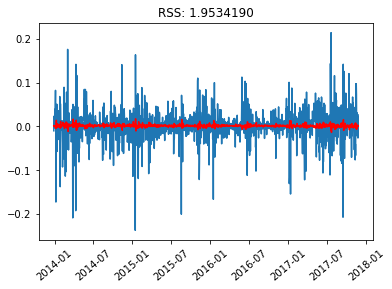

In [151]:
from statsmodels.tsa.arima_model import ARIMA
btcmodel = ARIMA(btcts_log, order=(2,1,0))  
btcresults_ARIMA = btcmodel.fit(disp=-1)  
plt.plot(btcts_log_diff)
plt.plot(btcresults_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((btcresults_ARIMA.fittedvalues-btcts_log_diff)**2))
plt.xticks(rotation=40)
plt.show()

Printing Predicted vs Expected Values...


predicted = 4394.624976,   expected = 4331.690000,   error = 1.452897  %
predicted = 4321.126408,   expected = 4160.620000,   error = 3.857752  %
predicted = 4171.568104,   expected = 4193.700000,   error = 0.527742  %
predicted = 4214.460901,   expected = 4087.660000,   error = 3.102041  %
predicted = 4091.360245,   expected = 4001.740000,   error = 2.239532  %
predicted = 4016.931473,   expected = 4100.520000,   error = 2.038486  %
predicted = 4113.267154,   expected = 4151.520000,   error = 0.921418  %
predicted = 4148.116030,   expected = 4334.680000,   error = 4.303985  %
predicted = 4334.989118,   expected = 4371.600000,   error = 0.837471  %
predicted = 4361.210604,   expected = 4352.400000,   error = 0.202431  %
predicted = 4355.623634,   expected = 4382.880000,   error = 0.621883  %
predicted = 4390.763751,   expected = 4382.660000,   error = 0.184905  %
predicted = 4386.371537,   expected = 4579.020000,   error = 4.207199  %
predicte

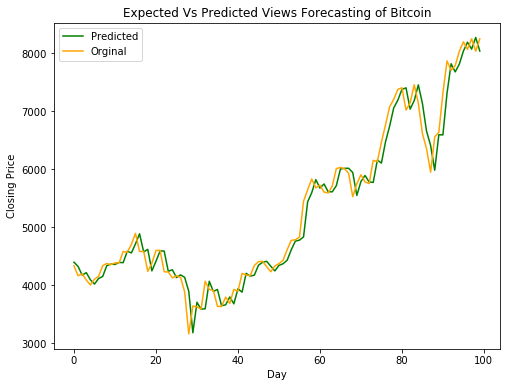

In [152]:
btcsize = int(len(ts_log)-100)
btctrain_arima, btctest_arima = btcts_log[0:btcsize], btcts_log[btcsize:len(btcts_log)]
btchistory = [x for x in btctrain_arima]
btcpredictions = list()
btcoriginals = list()
btcerror_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    btcmodel = ARIMA(btchistory, order=(2, 1, 0))
    btcmodel_fit = btcmodel.fit(disp=-1)
    
    btcoutput = btcmodel_fit.forecast()
    
    btcpred_value = btcoutput[0]
    
        
    btcoriginal_value = btctest_arima[t]
    btchistory.append(btcoriginal_value)
    
    btcpred_value = np.exp(btcpred_value)
    
    
    btcoriginal_value = np.exp(btcoriginal_value)
    
    btcerror = ((abs(btcpred_value - btcoriginal_value)) / btcoriginal_value) * 100
    btcerror_list.append(btcerror)
    print('predicted = %f,   expected = %f,   error = %f ' % (btcpred_value, btcoriginal_value, btcerror), '%')
    
    btcpredictions.append(float(btcpred_value))
    btcoriginals.append(float(btcoriginal_value))
    
   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(btcerror_list)/float(len(btcerror_list))), '%')
plt.figure(figsize=(8, 6))
btctest_day = [t
           for t in range(len(btctest_arima))]
labels={'Orginal','Predicted'}
plt.plot(btctest_day, btcpredictions, color= 'green')
plt.plot(btctest_day, btcoriginals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting of Bitcoin')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Ethereum Price Prediction

In [153]:
et= df.loc[df['Currencyname'] == 'ethereum']

In [154]:
print(et)

       Currencyname       Date       MarketCap     Close    Open      High  \
191215     ethereum   8-Aug-15     167,911,000  0.753325    2.79       2.8   
191216     ethereum   9-Aug-15      42,637,600  0.701897    0.71   0.87981   
191217     ethereum  10-Aug-15      43,130,000  0.708448    0.71  0.729854   
191218     ethereum  11-Aug-15      42,796,500      1.07    0.71      1.13   
191219     ethereum  12-Aug-15      64,018,400      1.22    1.06      1.29   
...             ...        ...             ...       ...     ...       ...   
192050     ethereum  20-Nov-17  33,933,400,000    366.73  354.09    372.14   
192051     ethereum  21-Nov-17  35,220,200,000     360.4  367.44    372.47   
192052     ethereum  22-Nov-17  34,544,000,000    380.65  360.31    381.42   
192053     ethereum  23-Nov-17  36,577,300,000    410.17  381.44    425.55   
192054     ethereum  24-Nov-17  39,564,300,000    474.91   412.5    480.97   

             Low         Volume  Unnamed: 8  
191215  0.714725 

In [155]:
print(et)

       Currencyname       Date       MarketCap     Close    Open      High  \
191215     ethereum   8-Aug-15     167,911,000  0.753325    2.79       2.8   
191216     ethereum   9-Aug-15      42,637,600  0.701897    0.71   0.87981   
191217     ethereum  10-Aug-15      43,130,000  0.708448    0.71  0.729854   
191218     ethereum  11-Aug-15      42,796,500      1.07    0.71      1.13   
191219     ethereum  12-Aug-15      64,018,400      1.22    1.06      1.29   
...             ...        ...             ...       ...     ...       ...   
192050     ethereum  20-Nov-17  33,933,400,000    366.73  354.09    372.14   
192051     ethereum  21-Nov-17  35,220,200,000     360.4  367.44    372.47   
192052     ethereum  22-Nov-17  34,544,000,000    380.65  360.31    381.42   
192053     ethereum  23-Nov-17  36,577,300,000    410.17  381.44    425.55   
192054     ethereum  24-Nov-17  39,564,300,000    474.91   412.5    480.97   

             Low         Volume  Unnamed: 8  
191215  0.714725 

In [156]:
et.isnull().sum()
et=et.iloc[:,[1,3]]
print(btc)
et["Close"] = et["Close"].astype('float64')
et.info()
et['Date'] = pd.to_datetime(et['Date'])
print(et)


            Date    Close
53546 2013-12-27   735.07
53547 2013-12-28   727.83
53548 2013-12-29   745.05
53549 2013-12-30   756.13
53550 2013-12-31   754.01
...          ...      ...
54970 2017-11-20  8200.64
54971 2017-11-21  8071.26
54972 2017-11-22  8253.55
54973 2017-11-23  8038.77
54974 2017-11-24  8253.69

[1429 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 191215 to 192054
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    840 non-null    object 
 1   Close   840 non-null    float64
dtypes: float64(1), object(1)
memory usage: 19.7+ KB
             Date       Close
191215 2015-08-08    0.753325
191216 2015-08-09    0.701897
191217 2015-08-10    0.708448
191218 2015-08-11    1.070000
191219 2015-08-12    1.220000
...           ...         ...
192050 2017-11-20  366.730000
192051 2017-11-21  360.400000
192052 2017-11-22  380.650000
192053 2017-11-23  410.170000
192054 2017-11-24  4

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2015-08-08  0.753325
2015-08-09  0.701897
2015-08-10  0.708448
2015-08-11  1.070000
2015-08-12  1.220000


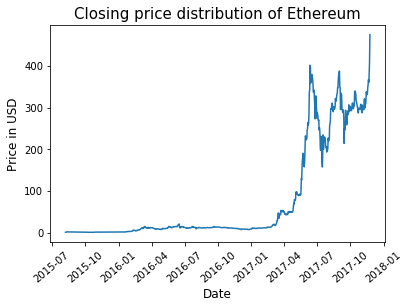

In [157]:
etdata = et['Close']
etdate = et['Date']
ettrain3 = et[['Date','Close']]
# Setting the Date as Index
ettrain4 = ettrain3.set_index('Date')
ettrain4.sort_index(inplace=True)
print (type(ettrain4))
print (ettrain4.head())
plt.plot(ettrain4)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Ethereum", fontsize=15)
plt.xticks(rotation=40)
plt.show()

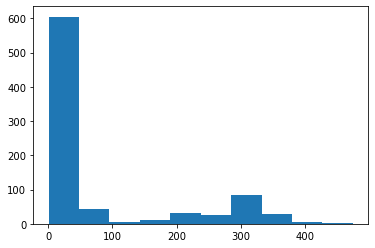

In [158]:
plt.hist(et['Close'])
plt.show()

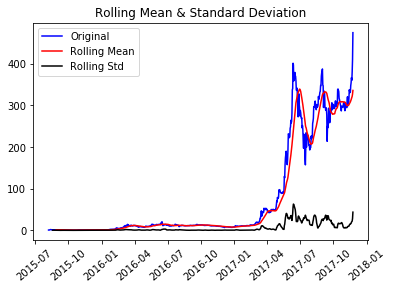

ADF Stastistic: 0.500064
p-value: 0.984875
The graph is non stationery
Critical values:
	1%: -3.438 
	5%: -2.865 
	10%: -2.569 


In [159]:
from statsmodels.tsa.stattools import adfuller

def test_stationarityet(x):


    #Determing rolling statistics
    etrolmean1 = x.rolling(window=22,center=False).mean()

    etrolstd1 = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    etorig1 = plt.plot(x, color='blue',label='Original')
    etmean1 = plt.plot(etrolmean1, color='red', label='Rolling Mean')
    etstd1 = plt.plot(etrolstd1, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=40)
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    etresult1=adfuller(x)
    print('ADF Stastistic: %f'%etresult1[0])
    print('p-value: %f'%etresult1[1])
    etpvalue=etresult1[1]
    for key,value in etresult1[4].items():
            if etresult1[0]>value:
                print("The graph is non stationery")
                break
            else:
                print("The graph is stationery")
                break;
    print('Critical values:')
    for key,value in etresult1[4].items():
        print('\t%s: %.3f ' % (key, value))
        
etts1 = ettrain4['Close']      
test_stationarityet(etts1)

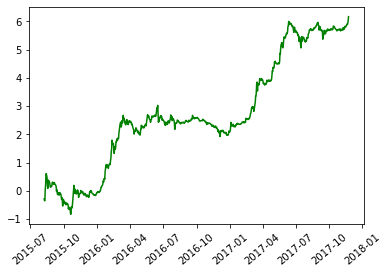

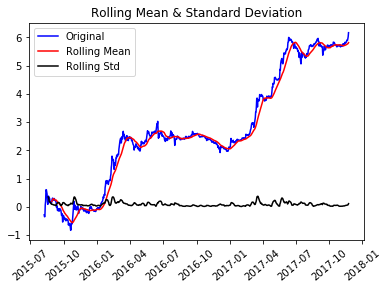

ADF Stastistic: -0.054868
p-value: 0.953752
The graph is non stationery
Critical values:
	1%: -3.438 
	5%: -2.865 
	10%: -2.569 


In [160]:
etts_log1 = np.log(etts1)
plt.plot(etts_log1,color="green")
plt.xticks(rotation=40)
plt.show()

test_stationarityet(etts_log1)

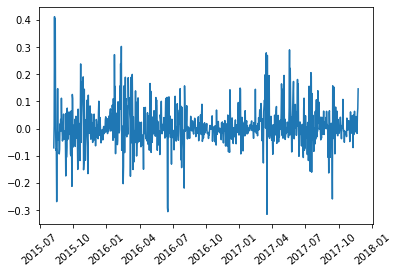

In [161]:
etts_log_diff1 = etts_log1 - etts_log1.shift()
plt.plot(etts_log_diff1)
plt.xticks(rotation=40)
plt.show()

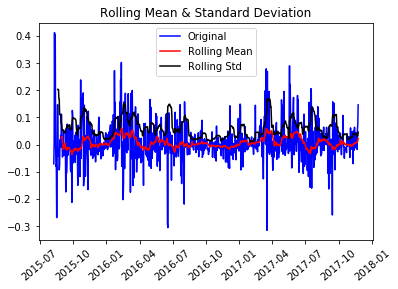

ADF Stastistic: -15.419770
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.438 
	5%: -2.865 
	10%: -2.569 


In [162]:
etts_log_diff1.dropna(inplace=True)
test_stationarityet(etts_log_diff1)

C:\Users\Huzaifa\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Huzaifa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D

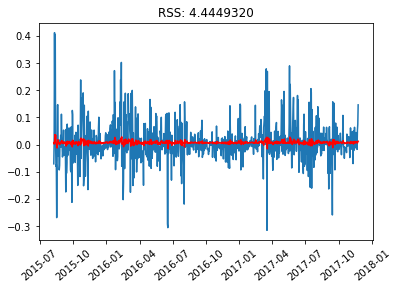

In [163]:
etmodel1 = ARIMA(etts_log1, order=(1,1,0)) 
etresults_ARIMA1 = etmodel1.fit(disp=-1)  
plt.plot(etts_log_diff1)
plt.plot(etresults_ARIMA1.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((etresults_ARIMA1.fittedvalues-etts_log_diff1)**2))
plt.xticks(rotation=40)
plt.show()

Printing Predicted vs Expected Values...


predicted = 305.446361,   expected = 301.460000,   error = 1.322352  %
predicted = 303.748860,   expected = 295.590000,   error = 2.760195  %
predicted = 297.262128,   expected = 297.470000,   error = 0.069880  %
predicted = 299.742769,   expected = 301.430000,   error = 0.559742  %
predicted = 303.991933,   expected = 321.590000,   error = 5.472206  %
predicted = 325.756600,   expected = 314.790000,   error = 3.483783  %
predicted = 316.766756,   expected = 317.520000,   error = 0.237227  %
predicted = 320.014085,   expected = 325.610000,   error = 1.718594  %
predicted = 328.725666,   expected = 331.920000,   error = 0.962381  %
predicted = 334.993868,   expected = 333.880000,   error = 0.333613  %
predicted = 336.580787,   expected = 347.890000,   error = 3.250801  %
predicted = 351.688165,   expected = 347.750000,   error = 1.132470  %
predicted = 350.473301,   expected = 370.670000,   error = 5.448701  %
predicted = 375.408837,   expected

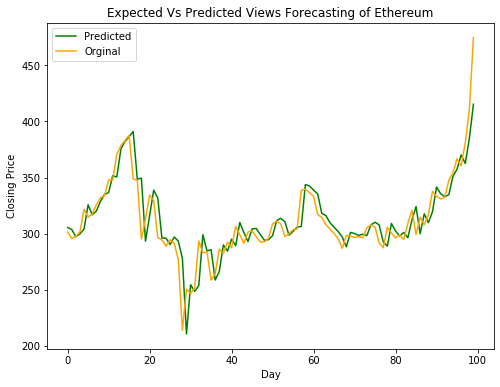

In [164]:
etsize1 = int(len(etts_log1)-100)
ettrain_arima1, ettest_arima1 = etts_log1[0:etsize1], etts_log1[etsize1:len(etts_log1)]
ethistory1 = [x for x in ettrain_arima1]
etpredictions1 = list()
etoriginals1 = list()
eterror_list1 = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(ettest_arima1)):
    etmodel1 = ARIMA(ethistory1, order=(2, 1, 0))
    etmodel_fit1 = etmodel1.fit(disp=-1)
    
    etoutput1 = etmodel_fit1.forecast()
    
    etpred_value1 = etoutput1[0]
    
        
    etoriginal_value1 = ettest_arima1[t]
    ethistory1.append(etoriginal_value1)
    
    etpred_value1 = np.exp(etpred_value1)
    
    
    etoriginal_value1 = np.exp(etoriginal_value1)
    
    eterror1 = ((abs(etpred_value1 - etoriginal_value1)) / etoriginal_value1) * 100
    eterror_list1.append(eterror1)
    print('predicted = %f,   expected = %f,   error = %f ' % (etpred_value1, etoriginal_value1, eterror1), '%')
    
    etpredictions1.append(float(etpred_value1))
    etoriginals1.append(float(etoriginal_value1))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(eterror_list1)/float(len(eterror_list1))), '%')
plt.figure(figsize=(8, 6))
ettest_day = [t
           for t in range(len(ettest_arima1))]
labels={'Orginal','Predicted'}
plt.plot(ettest_day, etpredictions1, color= 'green')
plt.plot(ettest_day, etoriginals1, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting of Ethereum')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)